<a href="https://colab.research.google.com/github/karenEdwardsVM/mushroomLearning/blob/master/mushroomLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import zipfile
from google.colab import drive
from pathlib import Path
import re

In [4]:
bs = 64
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive"

'2019.1.11 Updated Offer Letter_Karen Van Muijen.gdoc'
'2019.1.11 Updated Offer Letter_Karen Van Muijen.pdf'
'art noeveau.rtf'
'art noeveau.rtf.gdoc'
'art nouveau.rtf.gdoc'
'Biased Media Reporting.gslides'
'Campaign Proposal, ICS 11.gdoc'
'Campaign Visuals.gdoc'
'CMPS 119 Project.gslides'
'Colab Notebooks'
'Colorado Photos'
'Getting started.pdf'
 images.pdf
'Karen Van Muijen W-2.gdoc'
'Karen Van Muijen W-2.pdf'
 knight.png
'Lower Unit-667 Bellevue_lease agreement_Karen & Peter_2019_0619.gdoc'
'Lower Unit-667 Bellevue_lease agreement_Karen & Peter_2019_0619.pdf'
 MachineLearning
'Media, ICS 11.gdoc'
'Ornament and Crime.rtf'
'Ornament and Crime.rtf.gdoc'
'Personal Training.gsheet'
'Personal Training Photos'
'Phillips Fitness.gsheet'
 Tenant-Estoppel-Certificate-Tec-Car-Read-Only_667-Bellevue-Ave_04-01-2020.gdoc
 Tenant-Estoppel-Certificate-Tec-Car-Read-Only_667-Bellevue-Ave_04-01-2020.pdf
'Untitled document.gdoc'


In [7]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [8]:
ls

'2019.1.11 Updated Offer Letter_Karen Van Muijen.gdoc'
'2019.1.11 Updated Offer Letter_Karen Van Muijen.pdf'
'art noeveau.rtf'
'art noeveau.rtf.gdoc'
'art nouveau.rtf.gdoc'
'Biased Media Reporting.gslides'
'Campaign Visuals.gdoc'
'Colab Notebooks'/
'Colorado Photos'/
'Getting started.pdf'
 knight.png
'Lower Unit-667 Bellevue_lease agreement_Karen & Peter_2019_0619.gdoc'
'Lower Unit-667 Bellevue_lease agreement_Karen & Peter_2019_0619.pdf'
 MachineLearning/
'Personal Training Photos'/
 Tenant-Estoppel-Certificate-Tec-Car-Read-Only_667-Bellevue-Ave_04-01-2020.gdoc
 Tenant-Estoppel-Certificate-Tec-Car-Read-Only_667-Bellevue-Ave_04-01-2020.pdf
'Untitled document.gdoc'


In [11]:
cd images/

/content/drive/My Drive/MachineLearning/images


In [14]:
cd ..

/content/drive/My Drive/MachineLearning


In [0]:
with zipfile.ZipFile('/content/drive/My Drive/MachineLearning/images.zip', 'r') as fZip:
  fZip.extractall('/content/drive/My Drive/MachineLearning')

In [10]:
path = Path('/content/drive/My Drive/MachineLearning/images')
path.ls()

OSError: ignored

In [0]:
fnames = get_image_files(path)

In [17]:
fnames[:5]

[PosixPath('/content/drive/My Drive/MachineLearning/images/Chlorophyllum molybdites_13775095.jpg'),
 PosixPath('/content/drive/My Drive/MachineLearning/images/Leratiomyces percevalii_25594563.jpg'),
 PosixPath('/content/drive/My Drive/MachineLearning/images/Battarrea phalloides_1423595.jpg'),
 PosixPath('/content/drive/My Drive/MachineLearning/images/Psathyrella candolleana_16141961.jpg'),
 PosixPath('/content/drive/My Drive/MachineLearning/images/Pholiota terrestris_35685662.jpg')]

In [0]:
np.random.seed(2)
pattern = r'/([^/]+)_\d+.jpg$'

In [19]:
data = ImageDataBunch.from_name_re(path, fnames, pattern, ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/fastai/data_block.py:537: UserWarning: You are labelling your items with CategoryList.
Your valid set contained the following unknown labels, the corresponding items have been discarded.
Junghuhnia nitida, Cortinarius variosimilis, Cuphophyllus, Laccaria laccata pallidifolia, Osteina obducta...
  if getattr(ds, 'warn', False): warn(ds.warn)


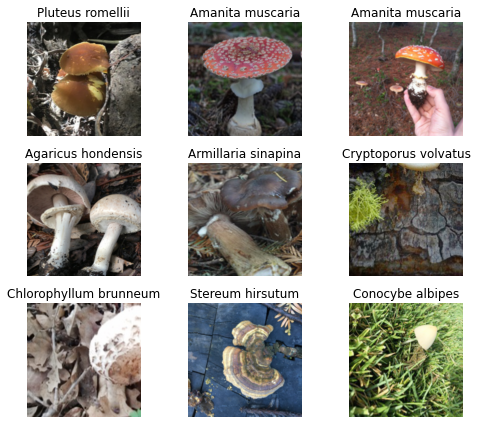

In [20]:
data.show_batch(rows=3, figsize=(7,6))

In [21]:
print(data.classes)
len(data.classes),data.c

['Abortiporus biennis', 'Acarospora badiofusca', 'Acarospora contigua', 'Acarospora elevata', 'Acarospora fuscata', 'Acarospora oreophila', 'Acarospora robiniae', 'Acarospora rosulata', 'Acarospora schleicheri', 'Acarospora socialis', 'Acarospora strigata', 'Acarospora thamnina', 'Acarospora thelococcoides', 'Acarospora veronensis', 'Acolium inquinans', 'Aecidium suaedae', 'Agaricus albolutescens', 'Agaricus arorae', 'Agaricus arvensis', 'Agaricus augustus', 'Agaricus augustus perrarus', 'Agaricus bernardii', 'Agaricus bisporus', 'Agaricus bitorquis', 'Agaricus brunneofibrillosus', 'Agaricus buckmacadooi', 'Agaricus californicus', 'Agaricus campestris', 'Agaricus comtulus', 'Agaricus cupreobrunneus', 'Agaricus deardorffensis', 'Agaricus deserticola', 'Agaricus diminutivus', 'Agaricus fuscofibrillosus', 'Agaricus fuscovelatus', 'Agaricus hondensis', 'Agaricus inapertus', 'Agaricus incultorum', 'Agaricus kerriganii', 'Agaricus lilaceps', 'Agaricus micromegethus', 'Agaricus moelleri', 'Ag

(2071, 2071)

In [22]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [23]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [0]:
doc(ImageDataBunch.from_name_re)

In [24]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,3.401053,2.743626,0.551822,35:22
1,2.764759,2.244021,0.469612,47:29
2,2.432987,2.030202,0.425206,33:43
3,2.248904,1.968481,0.411097,35:34


In [0]:
   learn.save('/content/drive/My Drive/MachineLearning/stage-0')

In [0]:
from google.colab import files

In [48]:
!zip -r stage-0.zip stage-0.pth

updating: stage-0.pth (deflated 7%)


MessageError: ignored

In [26]:
interp = ClassificationInterpretation.from_learner(learn)
losses,idxs = interp.top_losses()
len(data.valid_ds)==len(losses)==len(idxs)

True

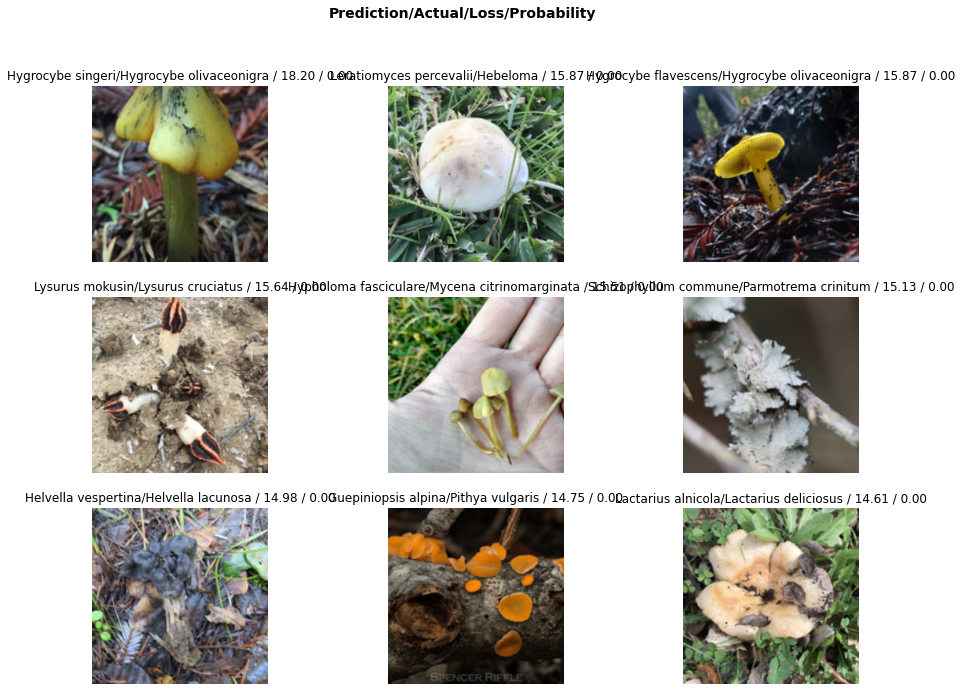

In [27]:
  interp.plot_top_losses(9, figsize=(15,11))

In [0]:
doc(interp.plot_top_losses)

In [0]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

NameError: ignored

In [53]:
interp.most_confused(min_val=2)

[('Amanita muscaria flavivolvata', 'Amanita muscaria', 53),
 ('Pleurotus pulmonarius', 'Pleurotus ostreatus', 39),
 ('Tremella mesenterica', 'Tremella aurantia', 38),
 ('Stereum hirsutum', 'Trametes versicolor', 36),
 ('Ganoderma applanatum', 'Ganoderma brownii', 32),
 ('Letharia columbiana', 'Letharia vulpina', 32),
 ('Trametes versicolor', 'Stereum hirsutum', 29),
 ('Laetiporus conifericola', 'Laetiporus gilbertsonii', 27),
 ('Agaricus xanthodermus', 'Volvopluteus gloiocephalus', 22),
 ('Helvella vespertina', 'Helvella dryophila', 19),
 ('Psathyrella candolleana', 'Coprinellus micaceus', 19),
 ('Trametes betulina', 'Trametes versicolor', 19),
 ('Agaricus californicus', 'Agaricus xanthodermus', 17),
 ('Flavopunctelia flaventior', 'Flavoparmelia caperata', 17),
 ('Hypholoma capnoides', 'Hypholoma fasciculare', 17),
 ('Usnea longissima', 'Ramalina menziesii', 17),
 ('Tremella aurantia', 'Tremella mesenterica', 16),
 ('Trichaptum abietinum', 'Trametes versicolor', 16),
 ('Amanita velosa'

In [1]:
learn.unfreeze()

NameError: ignored